In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = 2*np.pi/(224*60*60*24)

In [2]:
def torque_leconte(qo, n, Omega, wo): # analytic formulae from Leconte et al. (2015)
    sigma = (Omega-n)
    q_tilde = qo*(sigma/wo)/(1 + (sigma/wo)**2)
    lag = (sigma/wo)/np.sqrt(1 + (sigma/wo)**2)
    amp = qo * 1/np.sqrt(1 + (sigma/wo)**2)
    return(q_tilde, amp, lag)

In [3]:
Omega_list = np.linspace(-15*n, 16*n, 301)

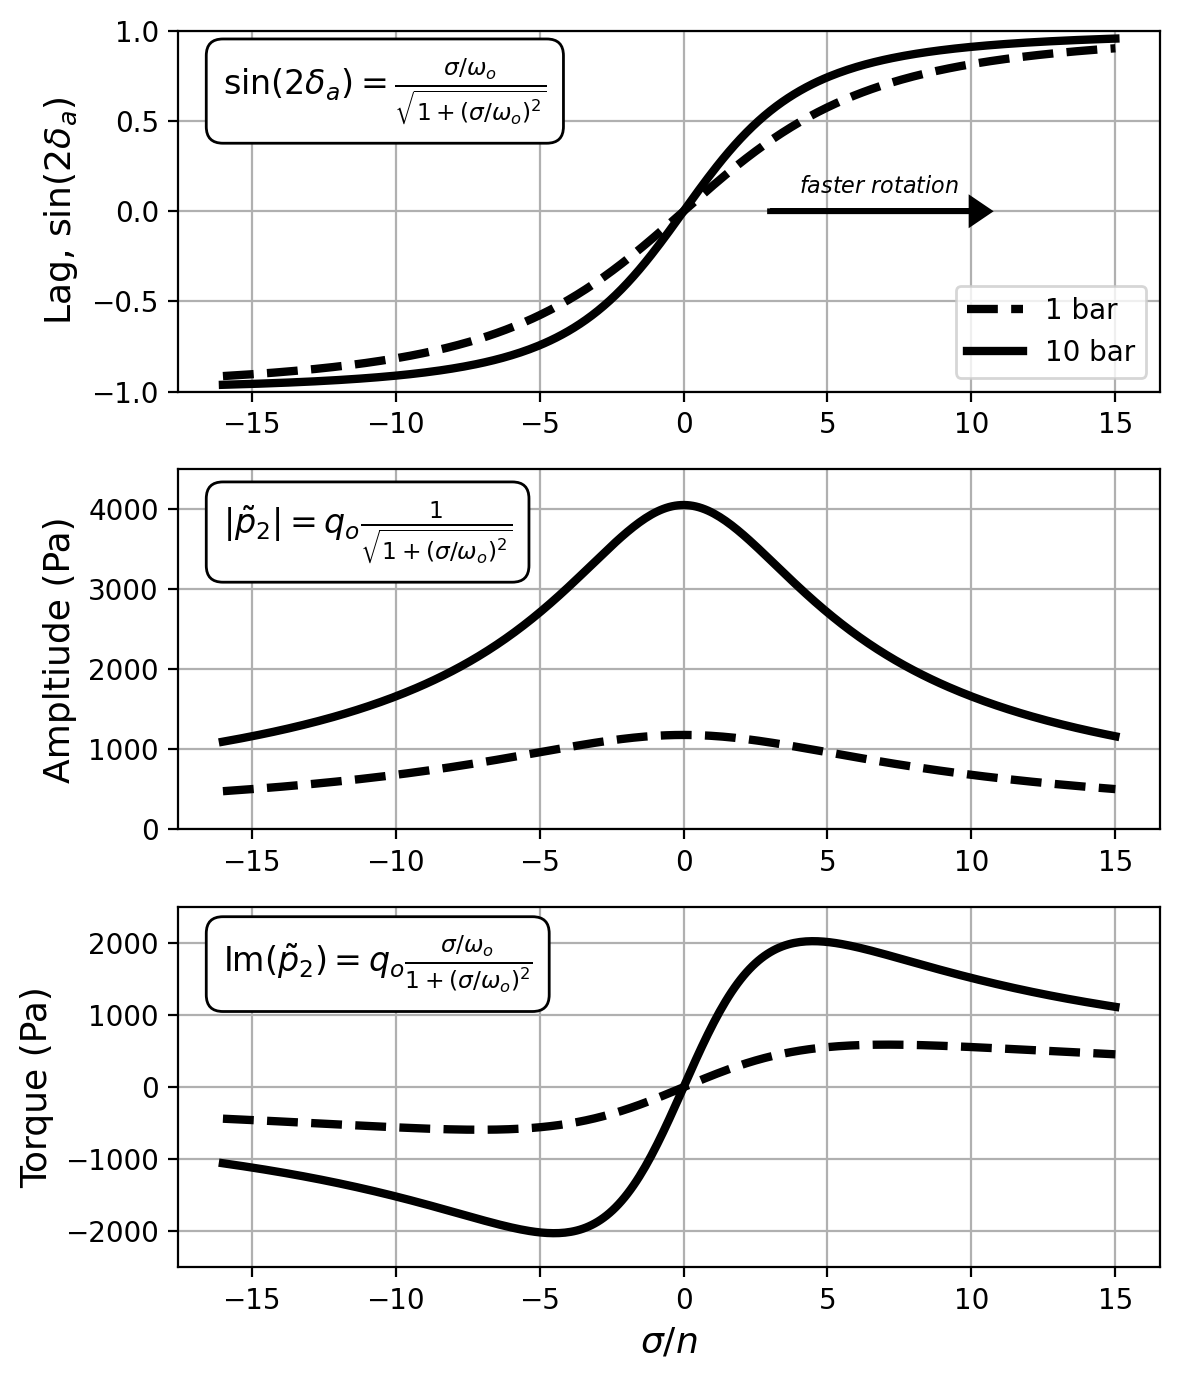

In [4]:
fig, ax = plt.subplots(3, dpi = 200, figsize=(6,7), tight_layout=True)

sig_n = (Omega_list-n)/n


ax[0].plot(sig_n, torque_leconte(1180, n, Omega_list, 2.3e-6)[2], 'k--', linewidth=3,label = '1 bar') # values for q_o taken from Table 1 of Leconte et al. (2015)
ax[0].plot(sig_n, torque_leconte(4050, n, Omega_list, 1.46e-6)[2], 'k',linewidth=3,label = '10 bar')
ax[0].grid()

#ax[0].set_xlabel('$\sigma/n$')
ax[0].set_ylabel('Lag, $\sin(2\delta_a)$', fontsize=13)
ax[0].set_ylim(-1,1)
ax[0].legend(loc = 'lower right',fontsize=10)

text = '$\sin(2\delta_a) = \\frac{\sigma/\omega_o}{\sqrt{1 + (\sigma/\omega_o)^2}}$'

ax[0].annotate(text, (-16,0.65), fontsize=12,bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

ax[1].plot(sig_n, torque_leconte(1180, n, Omega_list, 2.3e-6)[1], 'k--', linewidth=3)
ax[1].plot(sig_n, torque_leconte(4050, n, Omega_list, 1.46e-6)[1], 'k', linewidth=3)
ax[1].grid()

#ax[1].set_xlabel('$\sigma/n$')
ax[1].set_ylabel('Ampltiude (Pa)', fontsize=13)
ax[1].set_ylim(0,4500)

text = '$|\\tilde{p}_2| = q_o\\frac{1}{\sqrt{1 + (\sigma/\omega_o)^2}}$'

ax[1].annotate(text, (-16,3700), fontsize=12,bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

ax[2].plot(sig_n, torque_leconte(1180, n, Omega_list, 2.3e-6)[0], 'k--', linewidth=3)
ax[2].plot(sig_n, torque_leconte(4050, n, Omega_list, 1.46e-6)[0], 'k', linewidth=3)
ax[2].grid()
ax[2].set_ylim(-2500,2500)

ax[2].set_xlabel('$\sigma/n$', fontsize=13)
ax[2].set_ylabel('Torque (Pa)', fontsize=13)

text = 'Im$(\\tilde{p}_2) = q_o\\frac{\sigma/\omega_o}{1 + (\sigma/\omega_o)^2}$'

ax[2].annotate(text, (-16,1600), fontsize=12,bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

ax[0].set_axisbelow(True)
ax[0].arrow(3, 0, 7, 0, linewidth=2, head_width=0.13, head_length = 0.6, facecolor='k')
ax[0].text(4,0.1,'$\it{faster \ rotation}$', fontsize=8)
plt.savefig('./Paper Plots/SW_2024_Figure1.pdf', bbox_inches='tight')